In [2]:
# Import all headers

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Taking path of input images

base_dir = 'furniture-images/img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)

In [4]:
# Parameters for the graph, output images are in 4x4 configuration
rows = 1
cols = 8

# To iterate over images, 8 per line
pic_index = 0

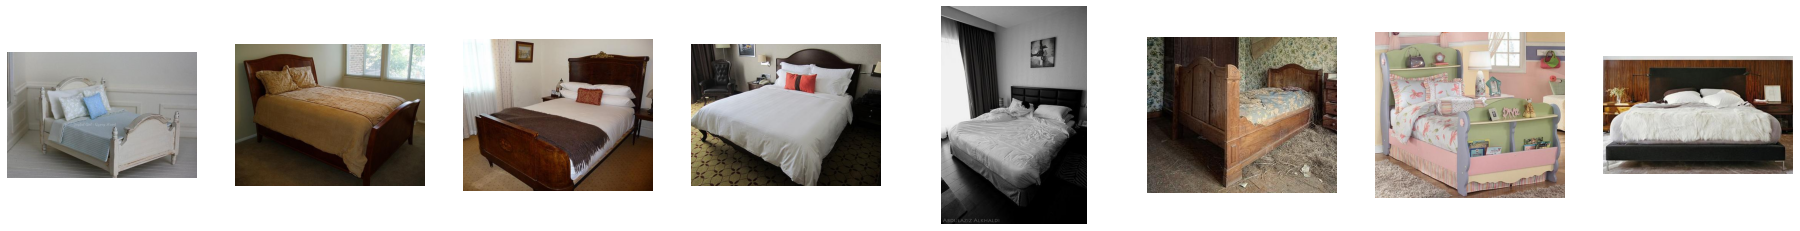

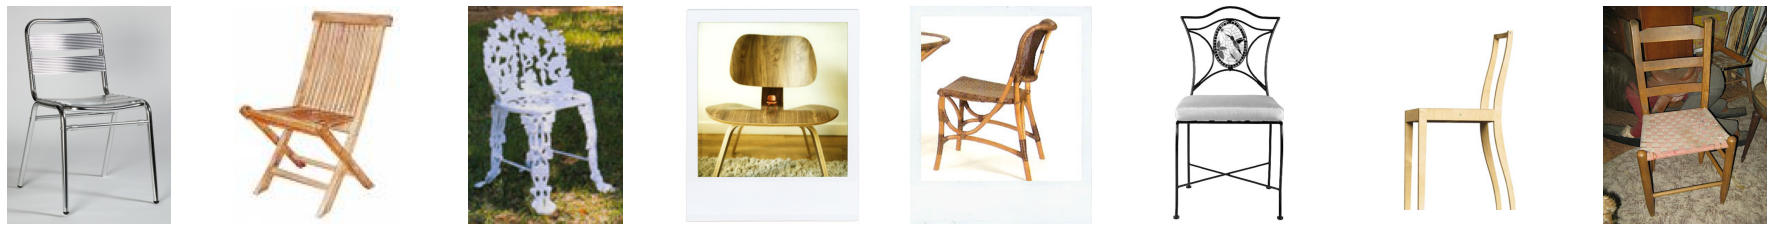

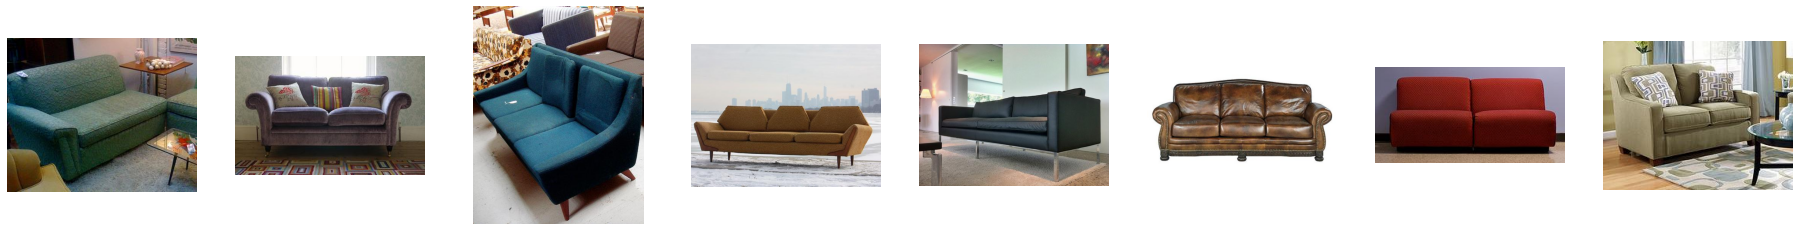

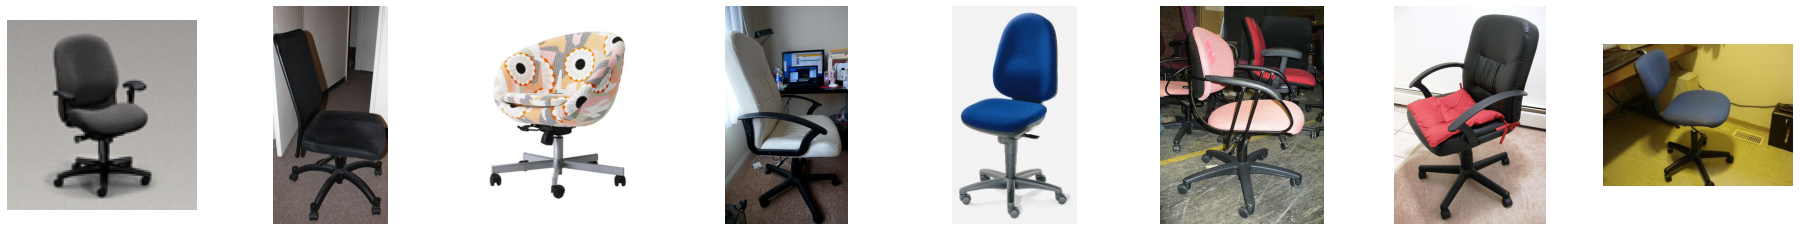

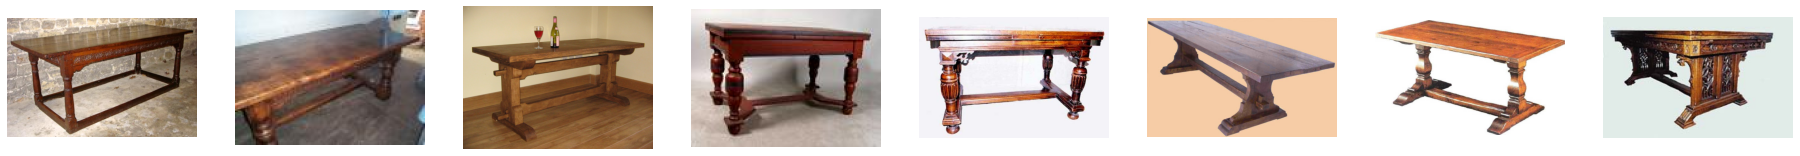

In [5]:
pic_index+=8

for it in category:
    
    fig = plt.gcf()
    fig.set_size_inches(cols * 4, rows * 4)    # Set up matplotlib fig and size it to 4x4
    
    train_cat_dir = os.path.join(train_dir, it)
    train_cat_fnames = os.listdir(train_cat_dir)
    next_pix = [os.path.join(train_cat_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
    
    for i, img_path in enumerate(next_pix):
        sp = plt.subplot(rows, cols, i + 1)    # Set up subplot, indeices starting at 1
        sp.axis('Off')                         # Don't show gridlines
        
        img = mpimg.imread(img_path)
        plt.imshow(img)
    
    plt.show()

In [6]:
# Checking no. of images in training and testing set

train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])

print("No. of images for training : ", train_files)
print("No. of images for testing : ", val_files)

No. of images for training :  4024
No. of images for testing :  423


In [7]:
''' 
    Set up hyperparameters
1) 5 classes - Chair, sofa, table, swivel chair, bed
2) No. of epochs - 5
3) No. of training samples = 4024
4) No. of testing samples = 423
5) Image dimension = 150 x 150
6) Batch size = 16

'''

classes = 5     
epochs = 5
nb_train_samples = train_files
nb_validation_samples = val_files
num_epochs = epochs

img_width, img_height = 150, 150
train_data_dir = train_dir
validation_data_dir = val_dir
batch_size = 16

### Building the Model

Model has 3 convolutional layers with filter size 3 and activation function ReLu. Each layer is followed by a maxpooling layer. After extracting features it is given to 1 fully connected layer. Output layer has 5 neurons with softmax activation function.

* Loss is calculated using cross entropy

In [8]:
# Input feature map is 150 x 150 x 3
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [9]:
# Flatten before giving to fully connected layer
x = layers.Flatten()(x)

# Fully connected layer with 512 neurons and ReLu activation
x = layers.Dense(512, activation='relu')(x)

# Output layer with 5 neurons and softmax activation
output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)

In [10]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

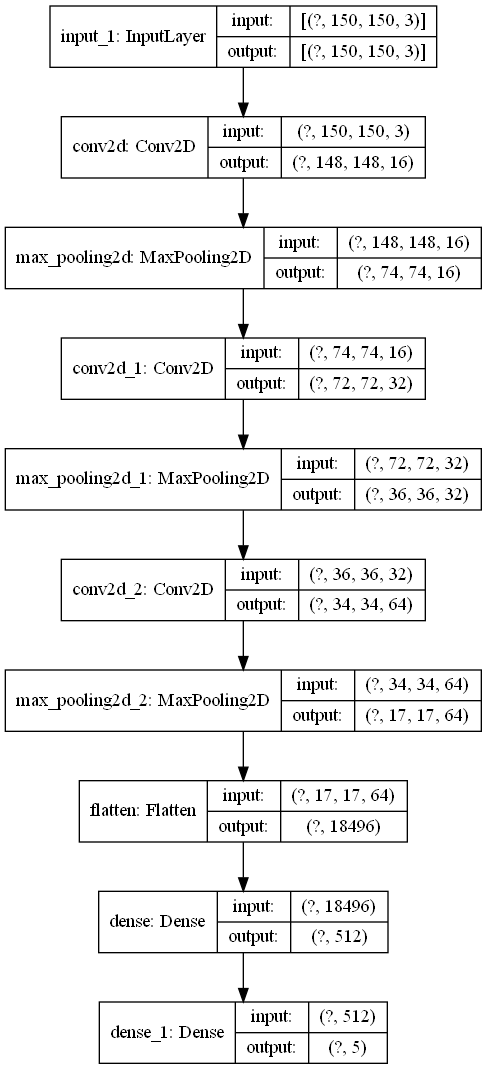

In [11]:
# install packages pydot, pydotplus, graphviz

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Run the model

In [12]:
# Optimizer - Adam, Loss function - Cross Entropy, Metrics - Accuracy

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Real time data augmentation while training the model

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,          # Shear angle
    zoom_range=0.2,           # Zoom
    horizontal_flip=True)     # Flip

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [14]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
251/251 [==============================] - 54s 217ms/step - loss: 0.9220 - accuracy: 0.6582 - val_loss: 0.6648 - val_accuracy: 0.7812
Epoch 2/5
251/251 [==============================] - 55s 220ms/step - loss: 0.5695 - accuracy: 0.7982 - val_loss: 0.4900 - val_accuracy: 0.8462
Epoch 3/5
251/251 [==============================] - 57s 225ms/step - loss: 0.4498 - accuracy: 0.8451 - val_loss: 0.4514 - val_accuracy: 0.8365
Epoch 4/5
251/251 [==============================] - 55s 220ms/step - loss: 0.3588 - accuracy: 0.8772 - val_loss: 0.3615 - val_accuracy: 0.8750
Epoch 5/5
251/251 [==============================] - 56s 221ms/step - loss: 0.2817 - accuracy: 0.9024 - val_loss: 0.3625 - val_accuracy: 0.8702


## Plot the results

In [15]:
history.history

{'loss': [0.922049343585968,
  0.5695083141326904,
  0.44982725381851196,
  0.3587980568408966,
  0.2817457318305969],
 'accuracy': [0.6581836342811584,
  0.7981536984443665,
  0.845059871673584,
  0.8772454857826233,
  0.9024451375007629],
 'val_loss': [0.6647669076919556,
  0.49002593755722046,
  0.4513745605945587,
  0.3614503741264343,
  0.3624744415283203],
 'val_accuracy': [0.78125,
  0.8461538553237915,
  0.8365384340286255,
  0.875,
  0.870192289352417]}

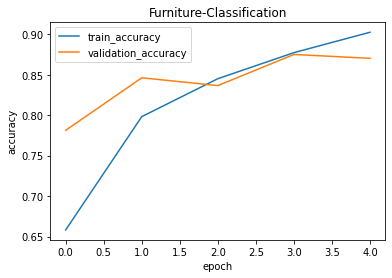

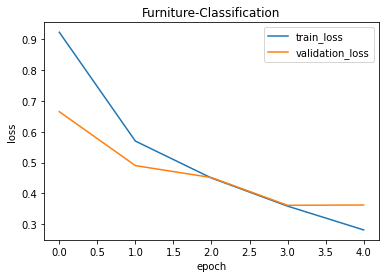

In [16]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification')
plot_loss(history,'Furniture-Classification')

                        2 layer ConvNet

In [17]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [18]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)

In [19]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

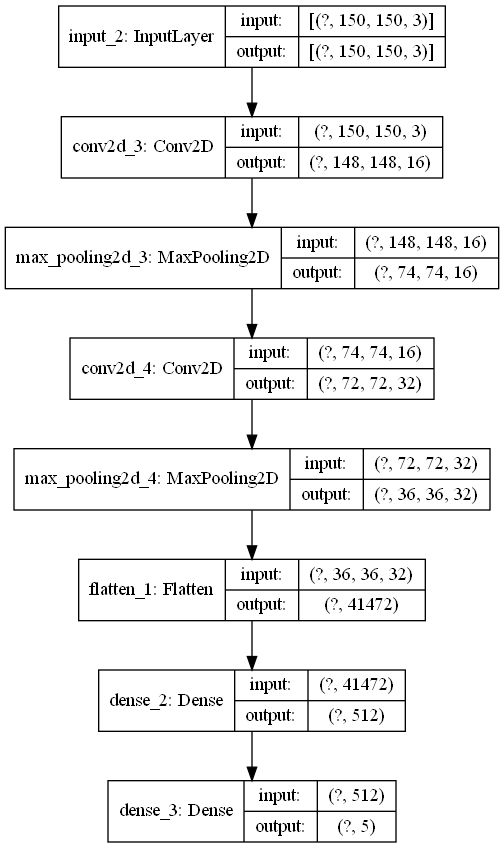

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,          # Shear angle
    zoom_range=0.2,           # Zoom
    horizontal_flip=True)     # Flip

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [23]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

Epoch 1/5
251/251 [==============================] - 61s 244ms/step - loss: 1.1264 - accuracy: 0.6180 - val_loss: 0.6064 - val_accuracy: 0.7764
Epoch 2/5
251/251 [==============================] - 62s 245ms/step - loss: 0.6304 - accuracy: 0.7797 - val_loss: 0.5250 - val_accuracy: 0.8149
Epoch 3/5
251/251 [==============================] - 61s 242ms/step - loss: 0.4771 - accuracy: 0.8318 - val_loss: 0.4851 - val_accuracy: 0.8125
Epoch 4/5
251/251 [==============================] - 61s 244ms/step - loss: 0.4235 - accuracy: 0.8483 - val_loss: 0.5633 - val_accuracy: 0.8005
Epoch 5/5
251/251 [==============================] - 62s 247ms/step - loss: 0.3611 - accuracy: 0.8800 - val_loss: 0.4467 - val_accuracy: 0.8510


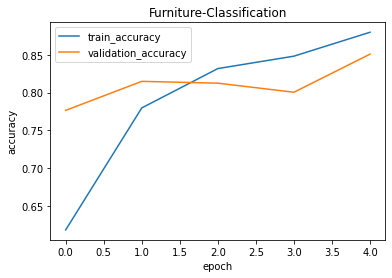

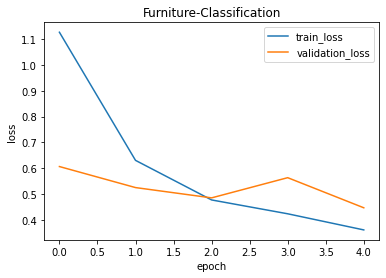

In [24]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification')
plot_loss(history,'Furniture-Classification')

### Inference

* No. of parameters were more in 2 layer cnn model (21,241,829) compared to 3 layers cnn model (9,496,613)
* Naturally, training became slower.
* Accuracy decreased from 87 % to 85 %
* Loss increased from 36 % to 44 %

                            4 layers ConvNet

In [25]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(8, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [26]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)

In [27]:
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)       

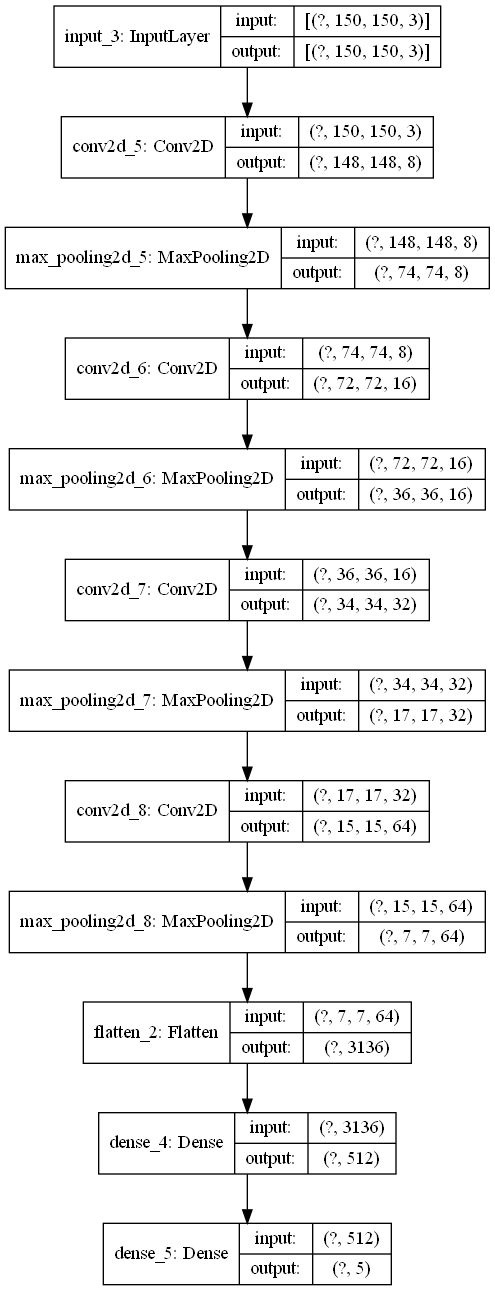

In [28]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,          # Shear angle
    zoom_range=0.2,           # Zoom
    horizontal_flip=True)     # Flip

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [31]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

Epoch 1/5
251/251 [==============================] - 45s 180ms/step - loss: 0.8617 - accuracy: 0.6879 - val_loss: 0.5907 - val_accuracy: 0.8101
Epoch 2/5
251/251 [==============================] - 46s 183ms/step - loss: 0.5436 - accuracy: 0.8049 - val_loss: 0.4487 - val_accuracy: 0.8341
Epoch 3/5
251/251 [==============================] - 46s 185ms/step - loss: 0.4369 - accuracy: 0.8486 - val_loss: 0.4838 - val_accuracy: 0.8221
Epoch 4/5
251/251 [==============================] - 41s 164ms/step - loss: 0.3769 - accuracy: 0.8782 - val_loss: 0.3895 - val_accuracy: 0.8630
Epoch 5/5
251/251 [==============================] - 40s 159ms/step - loss: 0.3392 - accuracy: 0.8792 - val_loss: 0.3521 - val_accuracy: 0.8798


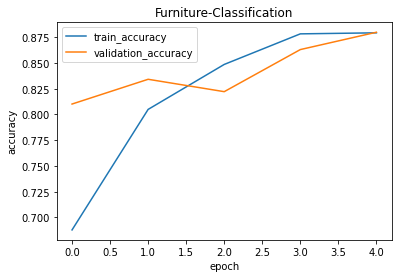

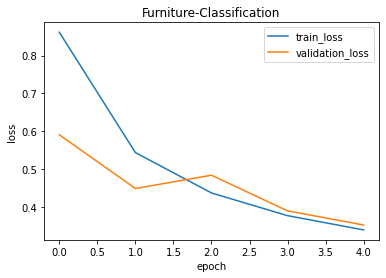

In [40]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification')
plot_loss(history,'Furniture-Classification')

### Inference

* No. of parameters are lesser in 4 layer cnn model (1,633,237) compared to 3 layers cnn model (9,496,613)
* Hence, training became faster.
* Accuracy slightly increased from 87 % to 88 %
* Loss decreased from 36 % to 35 %

                                VGG - 16

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (150, 150, 3), include_top = False,weights = 'imagenet')

58892288/58889256 [==============================] - 53s 1us/step


In [33]:
for layer in base_model.layers:
    layer.trainable = False

In [35]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,          # Shear angle
    zoom_range=0.2,           # Zoom
    horizontal_flip=True)     # Flip

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [38]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 116s 1s/step - loss: 0.4642 - accuracy: 0.8731 - val_loss: 0.2504 - val_accuracy: 0.9125
Epoch 2/10
100/100 [==============================] - 119s 1s/step - loss: 0.1974 - accuracy: 0.9400 - val_loss: 0.4750 - val_accuracy: 0.8629
Epoch 3/10
100/100 [==============================] - 120s 1s/step - loss: 0.1349 - accuracy: 0.9604 - val_loss: 0.1740 - val_accuracy: 0.9385
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 0.1149 - accuracy: 0.9606 - val_loss: 0.1888 - val_accuracy: 0.9314
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 0.1326 - accuracy: 0.9554 - val_loss: 0.1882 - val_accuracy: 0.9362
Epoch 6/10
100/100 [==============================] - 119s 1s/step - loss: 0.0759 - accuracy: 0.9725 - val_loss: 0.3217 - val_accuracy: 0.8960
Epoch 7/10
100/100 [==============================] - 119s 1s/step - loss: 0.0818 - accuracy: 0.9717 - val_loss: 0.1411 - val_accuracy: 0.9480

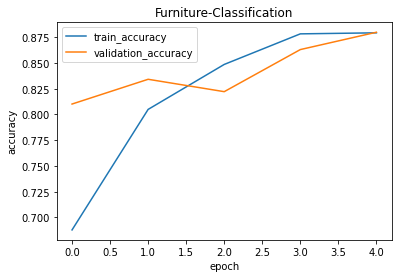

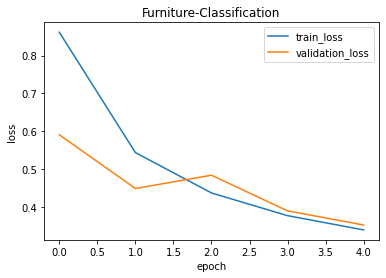

In [39]:
def plot_accuracy(vgghist,title):
    plt.title(title)
    plt.plot(vgghist.history['accuracy']) 
    plt.plot(vgghist.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(vgghist,title):
    plt.title(title)
    plt.plot(vgghist.history['loss'])
    plt.plot(vgghist.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification')
plot_loss(history,'Furniture-Classification')

### Inference

VGG gave accuracy of 95 % and loss 16 % with just 10 epochs
Hence, it is very powerful